In [55]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [56]:
file = Path('crypto_data.csv')

In [57]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [58]:
# List all algorithms in use
alg_list = set(df.Algorithm.values)

display(alg_list)

{'1GB AES Pattern Search',
 '536',
 'Argon2',
 'Argon2d',
 'Avesta hash',
 'BLAKE256',
 'Blake',
 'Blake2S',
 'Blake2b',
 'C11',
 'Cloverhash',
 'Counterparty',
 'CryptoNight',
 'CryptoNight Heavy',
 'CryptoNight Heavy X',
 'CryptoNight-Lite',
 'CryptoNight-V7',
 'CryptoNight-lite',
 'Cryptonight-GPU',
 'Curve25519',
 'DPoS',
 'Dagger',
 'Dagger-Hashimoto',
 'ECC 256K1',
 'Equihash',
 'Equihash+Scrypt',
 'Equihash1927',
 'Ethash',
 'Exosis',
 'Green Protocol',
 'Groestl',
 'HMQ1725',
 'HybridScryptHash256',
 'IMesh',
 'Jump Consistent Hash',
 'Keccak',
 'Leased POS',
 'Lyra2RE',
 'Lyra2REv2',
 'Lyra2Z',
 'M00N',
 'M7 POW',
 'Momentum',
 'Multiple',
 'NIST5',
 'NeoScrypt',
 'Ouroboros',
 'PHI1612',
 'PHI2',
 'POS 2.0',
 'POS 3.0',
 'PoS',
 'Progressive-n',
 'Proof-of-Authority',
 'Proof-of-BibleHash',
 'QUAIT',
 'QuBit',
 'Quark',
 'QuarkTX',
 'Rainforest',
 'SHA-256',
 'SHA-256 + Hive',
 'SHA-256D',
 'SHA-512',
 'SHA3',
 'SHA3-256',
 'Scrypt',
 'Scrypt-n',
 'ScryptOG',
 'Semux BFT cons

In [59]:
# print the counts of stocks being currently traded vs. not being currently traded 
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [60]:
# Select only cryptocurrencies that are being traded
df = df.loc[df['IsTrading']==True]
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [61]:
# Delete the IsTrading column; it is no longer necessary
df = df.drop(['IsTrading'], axis=1)
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [63]:
# Delete all rows with null values
#drop null rows--> axis=0 ; drop columns with missing values --> axis=1
cleanDF = df.dropna(axis=0, how='any')
cleanDF.shape

(685, 5)

In [64]:
# Sort values in TotalCoinsMined to identify negative or zero values
cleanDF.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [67]:
# Select only rows with positive TotalCoinsMined values
cleanDF = cleanDF[cleanDF['TotalCoinsMined']>0]
cleanDF.count()

CoinName           532
Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64

In [68]:
# Delete the CoinName column from the original dataframe
cleanDF = cleanDF.drop("CoinName", axis=1)
cleanDF

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [71]:

cleanDF.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [73]:
# Create dummy variables for columns with string values
d = pd.get_dummies(data=cleanDF, columns=["Algorithm", "ProofType"])
display(d.shape)
d

(532, 98)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Standardize the data
#StandardScaler gives vallues between 2 and -2; MinMaxs gives values between -1 and 1
scaler = StandardScaler()
d_scale = scaler.fit_transform(d)

In [78]:
# print the scaled data
d_scale[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [82]:
# Identify the numbers of rows and columns in the scaled data
d_scale.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [85]:
#Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, 
#whether that means reducing the dataset to 80 principal components or 3

# Reduce dimensions with PCA
pca = PCA(n_components=0.99)

# Get two principal components for the iris data.
d_pca = pca.fit_transform(d_scale)
d_pca.shape

(532, 86)

In [87]:
#For this project, preserve 90% of the explained variance in dimensionality reduction. 
#How did the number of the features change? *Numbers of columns reduced*



# Reduce dimensions with PCA
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
d_pca = pca.fit_transform(d_scale)
d_pca.shape

(532, 74)

In [88]:
# The sum of the explained variance of the principal components

pca.explained_variance_.sum()

88.47283457566154

In [95]:
# Reduce dimensions with t-SNE
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(d_pca)
tsne_features.shape

(532, 2)

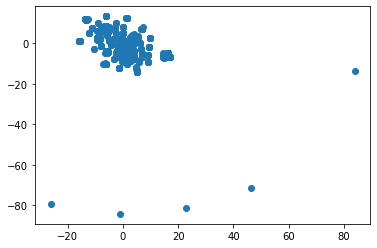

In [102]:
# Plot t-SNE output


# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]
plt.scatter(x,y)
plt.show()

In [103]:
# Identify clusters with k-means
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k; can use even numbers
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(d_pca)
    inertia.append(km.inertia_)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


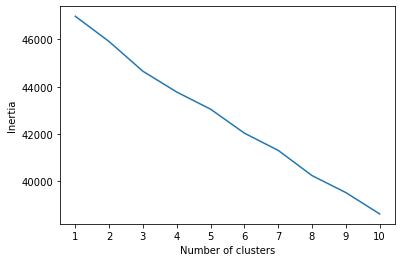

In [104]:
# Create an elbow plot
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation

<b>Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?</b>

Based on the tsne and elbow plot, the greatest amount of clusters possible is 1. The cryptocurrencies cannot be grouped to create the desired classification system for this investment.